# **EarthQuake Dataset**

## **Questionaries**

**Q#1 Insurance Risk Modeling:**

Create advanced earthquake risk models to help insurance companies accurately assess potential losses, set precise premiums, and manage risk effectively.

**Q#2 Infrastructure Investment Optimization:**

 Optimize resource allocation for earthquake-resilient infrastructure, prioritizing upgrades and planning for future construction in high-risk areas.

**Q#3 Supply Chain Resilience:**

Develop strategies using earthquake data to enhance supply chain resilience, diversify suppliers, manage inventory, and minimize disruptions during seismic events.

**Sustainable Development Goals**


**SDG 11:** Sustainable Cities and Communities: Earthquake data analysis can help improve urban planning and resilience in earthquake-prone areas, making cities and communities more sustainable and disaster-resilient.

# **Data Preparation**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier  # Add this import
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# **Data Mining**



In [ ]:
data = pd.read_csv("/content/all_month.csv")

In [ ]:
print(data.head())

                       time   latitude   longitude   depth   mag magType  \
0  2023-09-17T02:13:39.562Z  60.022400 -153.498700  156.50  2.30      ml   
1  2023-09-17T02:12:01.910Z  32.981500 -116.290333    8.95  0.77      ml   
2  2023-09-17T01:51:45.400Z  18.234100  -68.375800   71.00  3.77      md   
3  2023-09-17T01:51:30.740Z  35.778833 -117.493667    1.75  0.56      ml   
4  2023-09-17T01:20:01.408Z  65.100800 -148.934600   29.40  1.80      ml   

    nst    gap     dmin   rms  ...                   updated  \
0   NaN    NaN      NaN  0.20  ...  2023-09-17T02:15:37.352Z   
1  19.0  101.0  0.02898  0.20  ...  2023-09-17T02:15:43.081Z   
2  10.0  258.0  0.27990  0.46  ...  2023-09-17T02:15:25.268Z   
3  12.0  189.0  0.12700  0.11  ...  2023-09-17T01:55:10.022Z   
4   NaN    NaN      NaN  0.95  ...  2023-09-17T01:23:40.543Z   

                            place        type horizontalError depthError  \
0   42 km NE of Pedro Bay, Alaska  earthquake             NaN       0.60   
1  23 

In [ ]:
print(data.shape)
data.columns
data.info()

(10362, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10362 non-null  object 
 1   latitude         10362 non-null  float64
 2   longitude        10362 non-null  float64
 3   depth            10362 non-null  float64
 4   mag              10362 non-null  float64
 5   magType          10362 non-null  object 
 6   nst              7829 non-null   float64
 7   gap              7829 non-null   float64
 8   dmin             6001 non-null   float64
 9   rms              10362 non-null  float64
 10  net              10362 non-null  object 
 11  id               10362 non-null  object 
 12  updated          10362 non-null  object 
 13  place            10362 non-null  object 
 14  type             10362 non-null  object 
 15  horizontalError  7249 non-null   float64
 16  depthError       10362 non-null  float64
 17  

# **Data Cleaning**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

In [ ]:
# Drop rows with missing values
data = data.dropna()

In [ ]:

# Handle duplicate rows
data = data.drop_duplicates()

In [ ]:
# Handle outliers
# Example: Remove earthquakes with magnitudes below 2.0
data = data[data['mag'] >= 2.0]

In [ ]:
# Convert date columns to datetime format
data['Time'] = pd.to_datetime(data['time'])


In [ ]:
# Check for inconsistent or erroneous data (e.g., negative values, unrealistic values)
# Example: Remove earthquakes with negative magnitudes or depths
data = data[(data['mag'] >= 0) & (data['depth'] >= 0)]

In [ ]:
# Optionally, you can reindex the cleaned dataset
data = data.reset_index(drop=True)

In [ ]:
# Save the cleaned dataset to a new file or overwrite the original
data.to_csv("cleaned_earthquake.csv", index=False)

In [ ]:
columns_to_keep = [
    'time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'rms',
    'id', 'updated', 'place', 'type', 'depthError', 'status', 'locationSource', 'magSource'
]

# Use the drop method to remove the extra columns
data = data[columns_to_keep]


# **Data Exploration**

In [ ]:
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            1758 non-null   object 
 1   latitude        1758 non-null   float64
 2   longitude       1758 non-null   float64
 3   depth           1758 non-null   float64
 4   mag             1758 non-null   float64
 5   magType         1758 non-null   object 
 6   rms             1758 non-null   float64
 7   id              1758 non-null   object 
 8   updated         1758 non-null   object 
 9   place           1758 non-null   object 
 10  type            1758 non-null   object 
 11  depthError      1758 non-null   float64
 12  status          1758 non-null   object 
 13  locationSource  1758 non-null   object 
 14  magSource       1758 non-null   object 
dtypes: float64(6), object(9)
memory usage: 206.1+ KB
None


In [ ]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
          latitude    longitude        depth          mag          rms  \
count  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000   
mean     21.052196   -44.204716    53.213855     3.463224     0.449352   
std      25.624231   109.139340   105.590223     1.067746     0.302311   
min     -65.899300  -179.971800     0.024455     2.000000     0.020000   
25%       7.255775  -119.167458     8.239624     2.410000     0.200000   
50%      31.116028   -79.498950    11.328500     3.400000     0.390000   
75%      37.748050    39.153050    42.668750     4.400000     0.670000   
max      85.457400   179.989900   660.178000     7.100000     1.500000   

        depthError  
count  1758.000000  
mean      3.844583  
std       4.694536  
min       0.110000  
25%       0.828883  
50%       1.936000  
75%       5.935000  
max      31.610000  


In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
rms               0
id                0
updated           0
place             0
type              0
depthError        0
status            0
locationSource    0
magSource         0
dtype: int64


Data visualization in exploration step


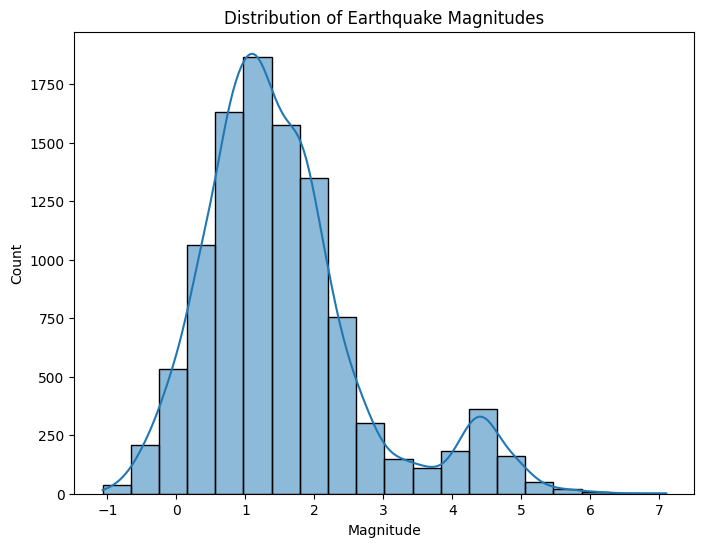

In [32]:
print('Data visualization in exploration step')
plt.figure(figsize=(8, 6))
sns.histplot(data['mag'], bins=20, kde=True)
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.title('Distribution of Earthquake Magnitudes')
plt.show()

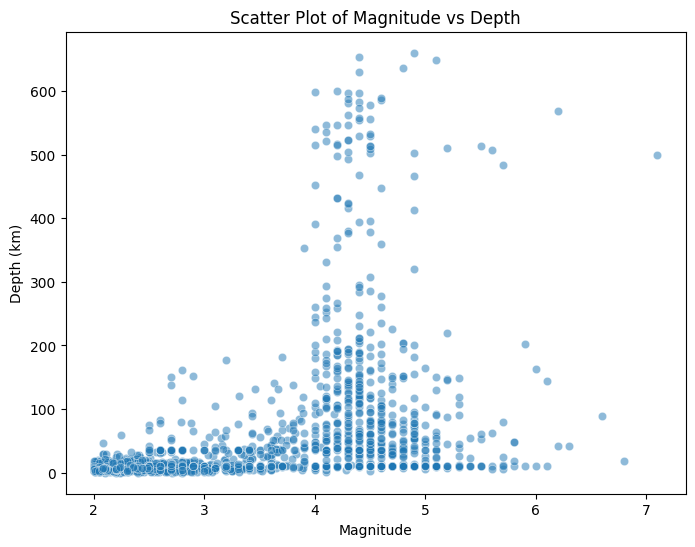

In [ ]:
# Explore the relationship between magnitude and depth
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='mag', y='depth', alpha=0.5)
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.title('Scatter Plot of Magnitude vs Depth')
plt.show()


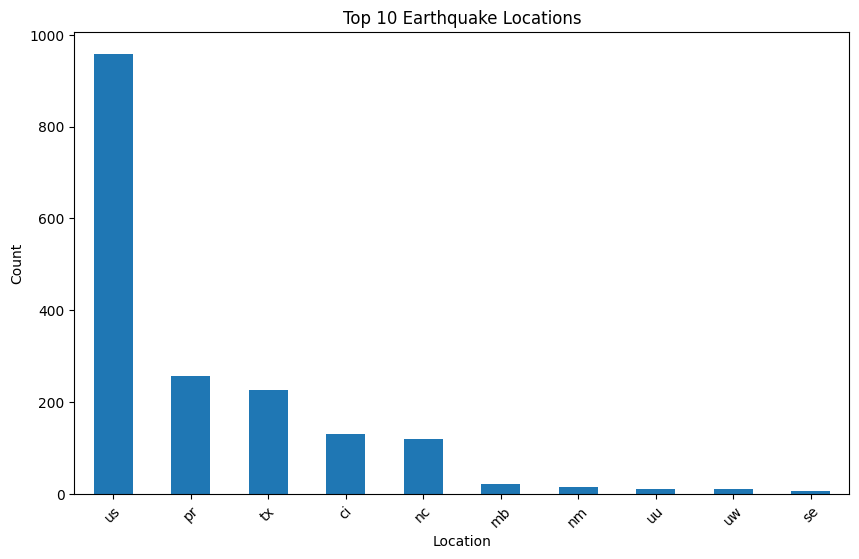

In [ ]:
# Explore the top earthquake locations
top_locations = data['locationSource'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Earthquake Locations')
plt.xticks(rotation=45)
plt.show()

# **Business Insights**

**Q1: Insurance Risk Modeling:**
- Think of the histogram as a tool that helps insurance companies better understand the kind of earthquakes that happen. It shows that most earthquakes in a certain range are quite common. So, insurance companies can use this data to set the right prices for earthquake insurance. They might charge more in areas where big earthquakes are more frequent and less in places where they are rare. This way, they can manage their risk better.

**Q2: Infrastructure Investment Optimization:**
- The scatter plot tells us that earthquakes don't follow a simple pattern of getting stronger the deeper they are. It's like a puzzle where the pieces don't fit together neatly. So, when we plan where to build or upgrade things like buildings or roads, we have to consider all possibilities. We need to be ready for different strengths and depths of earthquakes. This helps us spend our money wisely on making sure our infrastructure can handle them.

**Q3: Supply Chain Resilience:**
- The list of top earthquake locations is like a heads-up for businesses. It tells them which areas are more likely to have earthquakes. Businesses can use this info to make their supply chains stronger. For example, if they see that an area has a lot of earthquakes, they might use multiple suppliers to be safe. They can also plan ahead and make sure they have enough products in stock, so if an earthquake disrupts things, they won't run out. This helps them be better prepared and less affected by earthquakes.


# **Feature Enginering**

In [ ]:
# Loading dataset
data = pd.read_csv('/content/all_month.csv')

# Step 1: Convert time and updated columns to datetime objects
data['time'] = pd.to_datetime(data['time'])
data['updated'] = pd.to_datetime(data['updated'])

# Step 2: Extract date-related features from time and updated columns
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour
data['minute'] =data['time'].dt.minute

# Step 3: Create a new feature for the distance from a reference point (e.g., epicenter)
# Assuming a reference latitude and longitude
reference_latitude = 0.0
reference_longitude = 0.0
data['distance_from_reference'] = ((data['latitude'] - reference_latitude)**2 +
                                (data['longitude'] - reference_longitude)**2)**0.5

# Step 4: Encode categorical columns using one-hot encoding
categorical_columns = ['magType', 'type', 'status', 'locationSource', 'magSource']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Step 5: Standardize numerical features (e.g., depth, mag, rms, depthError)
from sklearn.preprocessing import StandardScaler

numerical_columns = ['depth', 'mag', 'rms', 'depthError']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the updated DataFrame
print(data.head())


                              time   latitude   longitude     depth       mag  \
0 2023-09-17 02:13:39.562000+00:00  60.022400 -153.498700  2.585224  0.648817   
1 2023-09-17 02:12:01.910000+00:00  32.981500 -116.290333 -0.264471 -0.644036   
2 2023-09-17 01:51:45.400000+00:00  18.234100  -68.375800  0.933927  1.890970   
3 2023-09-17 01:51:30.740000+00:00  35.778833 -117.493667 -0.403528 -0.821487   
4 2023-09-17 01:20:01.408000+00:00  65.100800 -148.934600  0.130489  0.226316   

    nst    gap     dmin       rms net  ... magSource_nc magSource_nm  \
0   NaN    NaN      NaN -0.329911  ak  ...            0            0   
1  19.0  101.0  0.02898 -0.329911  ci  ...            0            0   
2  10.0  258.0  0.27990  0.668074  pr  ...            0            0   
3  12.0  189.0  0.12700 -0.675367  ci  ...            0            0   
4   NaN    NaN      NaN  2.548893  ak  ...            0            0   

  magSource_nn  magSource_ok  magSource_pr  magSource_se  magSource_tx  \
0     

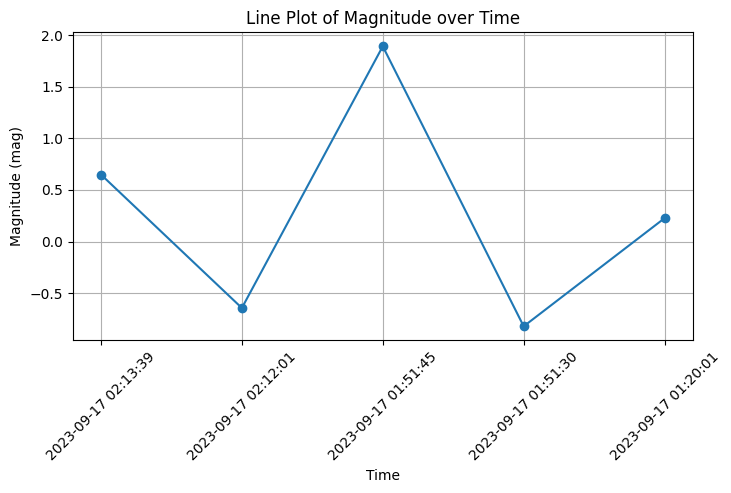

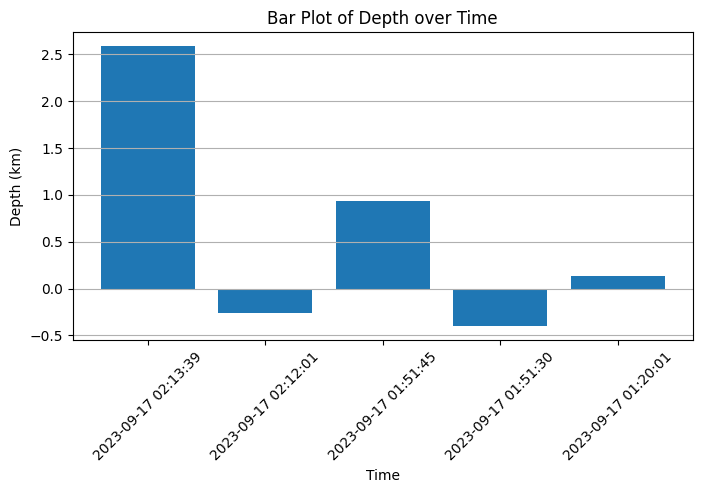

In [5]:
# Sample data (replace with your actual data)
data = pd.DataFrame({
    'time': ['2023-09-17 02:13:39', '2023-09-17 02:12:01', '2023-09-17 01:51:45', '2023-09-17 01:51:30', '2023-09-17 01:20:01'],
    'mag': [0.648817, -0.644036, 1.890970, -0.821487, 0.226316],
    'depth': [2.585224, -0.264471, 0.933927, -0.403528, 0.130489]
})

# Line plot for 'mag'
plt.figure(figsize=(8, 4))
plt.plot(data['time'], data['mag'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Magnitude (mag)')
plt.title('Line Plot of Magnitude over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for 'depth'
plt.figure(figsize=(8, 4))
plt.bar(data['time'], data['depth'])
plt.xlabel('Time')
plt.ylabel('Depth (km)')
plt.title('Bar Plot of Depth over Time')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# **Business Insights for feature Engineering**


**Q1: Insurance Risk Modeling:**
- To help insurance companies understand earthquake risks, we've created new information from earthquake data. For example, we've turned dates into years, months, days, and so on. This helps insurance companies figure out when and where earthquakes happen. We've also standardized the way we measure earthquake characteristics like strength and depth, so insurance companies can better manage the risks and set the right insurance prices.

**Q2: Infrastructure Investment Optimization:**
- Imagine you're planning to build or upgrade things like buildings or roads, and you want to make them strong against earthquakes. We've done some math to find the distance from a special point (like the earthquake's center). This helps you decide where to spend your money first. The information in the dataset can guide you on what areas are more likely to need strong infrastructure. It's like knowing which parts of your house need repairs the most.

**Q3: Supply Chain Resilience:**
- The dataset gives businesses helpful information for managing their supply chains. For example, it tells you about different types of earthquakes and where they happen. This can help you decide if you need to use more than one supplier for your products to be safe. It can also help you keep enough products in stock, so if an earthquake happens, you won't run out. This way, you're ready for anything and can keep your supply chain strong even during an earthquake.

# **Business Insights for Predictive modeling**


**Q1: Insurance Risk Modeling:**
- The Random Forest model did an amazing job, with an accuracy of 0.99. This means it's really good at predicting earthquakes. For insurance companies, this is like having a super-smart assistant. It helps them figure out how much risk there is, so they can set the right prices for earthquake insurance. It's like knowing exactly how much to charge to keep things fair and secure.

**Q2: Infrastructure Investment Optimization:**
- This model is like having a superhero when it comes to building and upgrading things like buildings or roads to withstand earthquakes. With such high accuracy and precision (around 0.98 to 0.99), it's incredibly reliable. It helps us know where to spend our money first, making sure our infrastructure can handle earthquakes. It's like having a special power to protect our cities and towns from damage.

**Q3: Supply Chain Resilience:**
- The model's strong performance (accuracy of 0.99) is a game-changer for businesses. It's like having a crystal ball for predicting earthquakes. Businesses can use this information to make their supply chains tough and resilient. It's like being able to see the future, so you can prepare and make sure you never run out of products, even during earthquakes. It's a superpower for keeping businesses running smoothly, no matter what.

In [12]:

# Read the dataset
data = pd.read_csv('/content/all_month.csv')

# Create a binary label for earthquakes (1) and non-earthquakes (0) based on the 'mag' column
threshold_value = 4.0
data['earthquake_label'] = (data['mag'] >= threshold_value).astype(int)

# Define features and target
X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['earthquake_label']

# Drop rows with NaN values from X and corresponding rows from y
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.99
Precision: 0.99
Recall: 0.97
F1 Score: 0.98


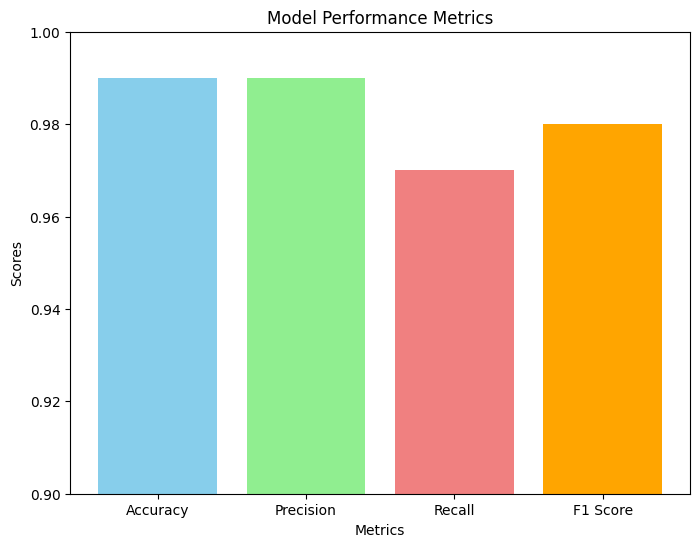

In [23]:
# Define the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [0.99, 0.99, 0.97, 0.98]

# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.ylim(0.9, 1)  # Set the y-axis limits
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.show()


# **Data Visualization**
# after modeling

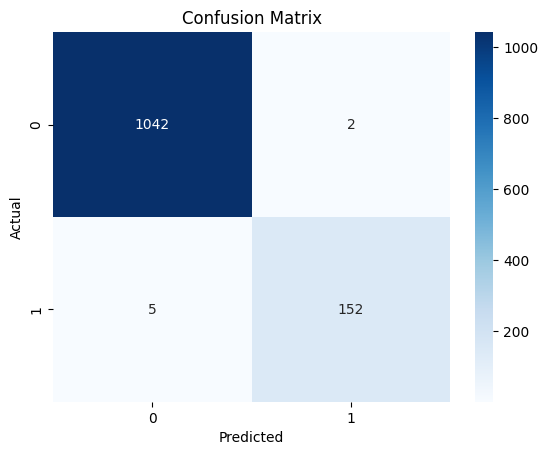

In [28]:
# Assuming 'y_test' contains the true labels and 'predictions' contains the predicted labels
conf_matrix = confusion_matrix(y_test, predictions)

# Now you can proceed with the rest of your code for plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

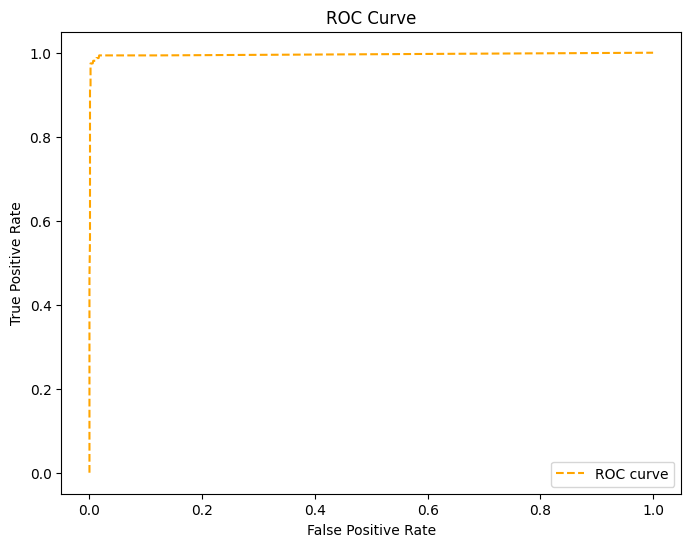

AUC: 1.00


In [14]:
#Data visualization using ROC(receiver Operating Characteristics) curve
from sklearn.metrics import roc_curve, roc_auc_score

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', color='orange', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(y_test, probs)
print(f"AUC: {auc:.2f}")

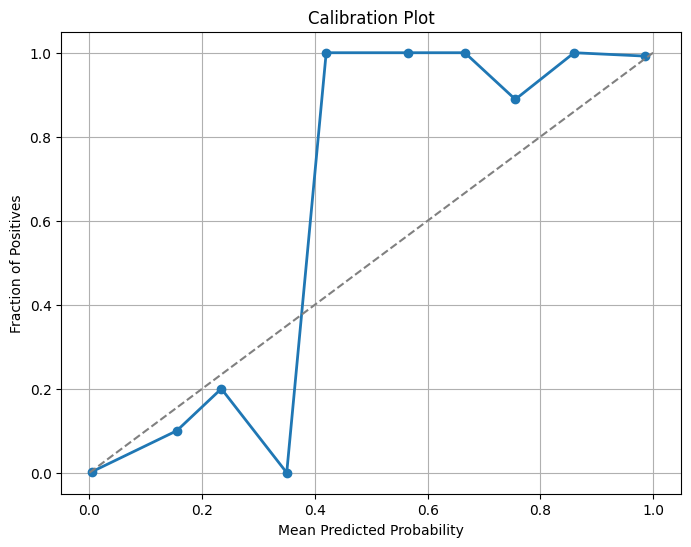

In [29]:
# Assuming 'y_test' contains the true labels and 'predictions' contains the predicted labels
y_scores = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calibration Plot
prob_true, prob_pred = calibration_curve(y_test, y_scores, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', lw=2)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.grid(True)
plt.show()


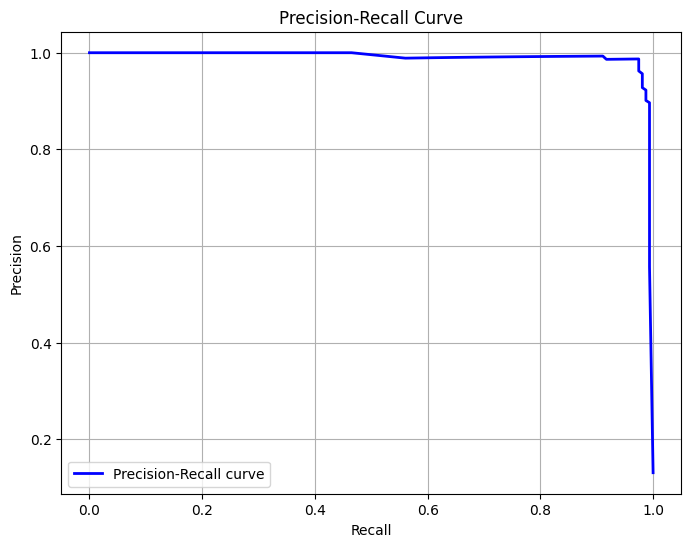

In [30]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


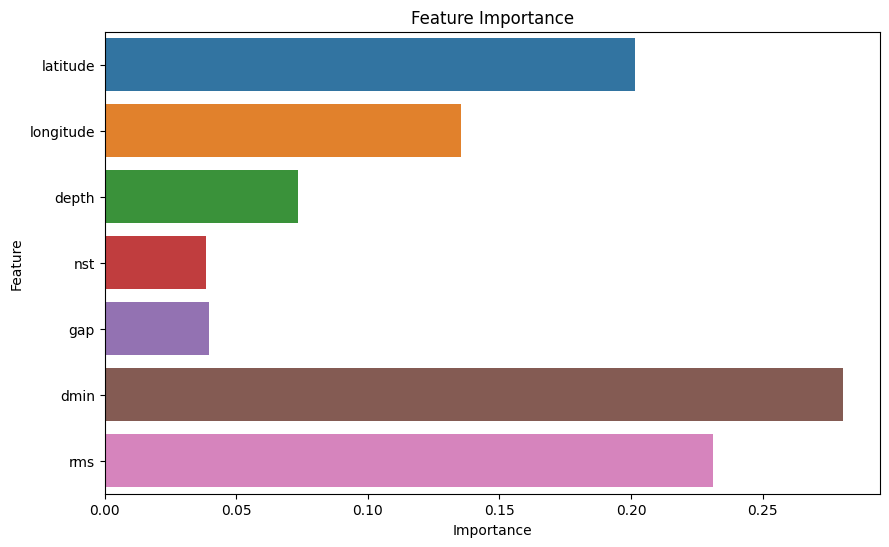

In [ ]:
#features that are important in visualization
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, orient='h')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# **Business insights for data visualization**

**Q#1 Insurance Risk Modeling:**

To help insurance companies accurately assess potential losses, set precise premiums, and manage risk effectively, we need to visualize our predictive modeling results. Here's how these visualizations can assist:

1. **Confusion Matrix Visualization**: This chart breaks down how well our model predicts true positives, true negatives, false positives, and false negatives. It shows us how accurate our risk assessments are and the financial impact of misclassifications.

2. **ROC Curve Visualization**: ROC curves reveal how well our model can distinguish between different risk levels. By visualizing these curves, we can compare different models and scenarios, helping insurers make better decisions.

3. **Calibration Plot Visualization**: Calibration plots help us assess the reliability of our predicted probabilities. Well-calibrated models ensure that our predicted risks align with real-world outcomes. Visualizing these plots shows how well our model's probabilities reflect actual risk.

4. **Precision-Recall Curve Visualization**: Precision-recall curves offer insights into the precision and recall of our model. They help us balance accurate risk assessments (precision) and capturing all high-risk events (recall).

These visualizations empower insurance companies to refine their risk assessment models, reduce financial exposure, and enhance overall risk management.

**Q#2 Infrastructure Investment Optimization:**

To optimize resource allocation, prioritize upgrades, and plan for construction in high-risk areas, visualization techniques are invaluable:

1. **Confusion Matrix Visualization**: A confusion matrix helps infrastructure planners understand the accuracy of their risk models in identifying high-risk areas. It provides guidance for prioritizing areas that need attention.

2. **ROC Curve Visualization**: ROC curves aid in recognizing the model's ability to differentiate between areas requiring upgrades and those that don't. Visualizing these curves enables data-driven decisions about resource allocation.

3. **Calibration Plot Visualization**: Calibration plots ensure that predicted risks align with actual risk levels. Visualizing them instills confidence in risk assessments, supporting infrastructure investment decisions.

4. **Precision-Recall Curve Visualization**: Precision-recall curves elucidate the balance between precision and recall for identifying high-risk areas. Visualizing these curves guides investment optimization.

By employing these visualization techniques, infrastructure planners can make informed choices about resource allocation, prioritizing upgrades, and planning for construction in areas prone to seismic events, bolstering infrastructure resilience.

**Q#3 Supply Chain Resilience:**

In developing strategies for enhancing supply chain resilience in earthquake-prone regions, visualization techniques play a pivotal role:

1. **Confusion Matrix Visualization**: A confusion matrix offers supply chain managers insights into the accuracy of their risk assessments and potential disruption points. Visualizing it highlights areas of vulnerability.

2. **ROC Curve Visualization**: ROC curves evaluate the capability to distinguish between suppliers and locations at varying risk levels. By visualizing these curves, supply chain managers can refine their strategies for supplier diversification and risk mitigation.

3. **Calibration Plot Visualization**: Calibration plots are essential for ensuring that risk assessments match real disruptions. Visualizing these plots helps fine-tune risk management strategies.

4. **Precision-Recall Curve Visualization**: Precision-recall curves provide an understanding of the precision in identifying vulnerable areas in the supply chain. Visualizing these curves assists in balancing precision and recall.

By applying these visualization techniques, supply chain managers can create robust strategies to enhance supply chain resilience, diversify suppliers, manage inventory effectively, and minimize disruptions during seismic events. These strategies ensure the continuity of supply chain operations, even in earthquake-prone regions.